<a href="https://colab.research.google.com/github/RDifault/Machine-and-Deep-Learning-Projects/blob/main/Glass_Classification_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Import libraries yang diperlukan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sn
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('glass_3.csv')

df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


In [ ]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [ ]:
# x = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
# y = ['Type']

x_data = df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]
y_data = df['Type']

# x_data = df[x].values
# y_data = df[y].values

# x_data = df.drop("Type", axis=1)
# y_data = df.Type

x_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [ ]:
y_data

0      0
1      0
2      0
3      0
4      0
      ..
209    5
210    5
211    5
212    5
213    5
Name: Type, Length: 214, dtype: int64

In [ ]:
df_corr = df.corr()['Type'].abs().sort_values(ascending=False)
df_corr

Type    1.000000
Mg      0.728160
Al      0.591198
Ba      0.577676
Na      0.506424
Fe      0.183207
RI      0.168739
Si      0.149691
K       0.025835
Ca      0.008998
Name: Type, dtype: float64

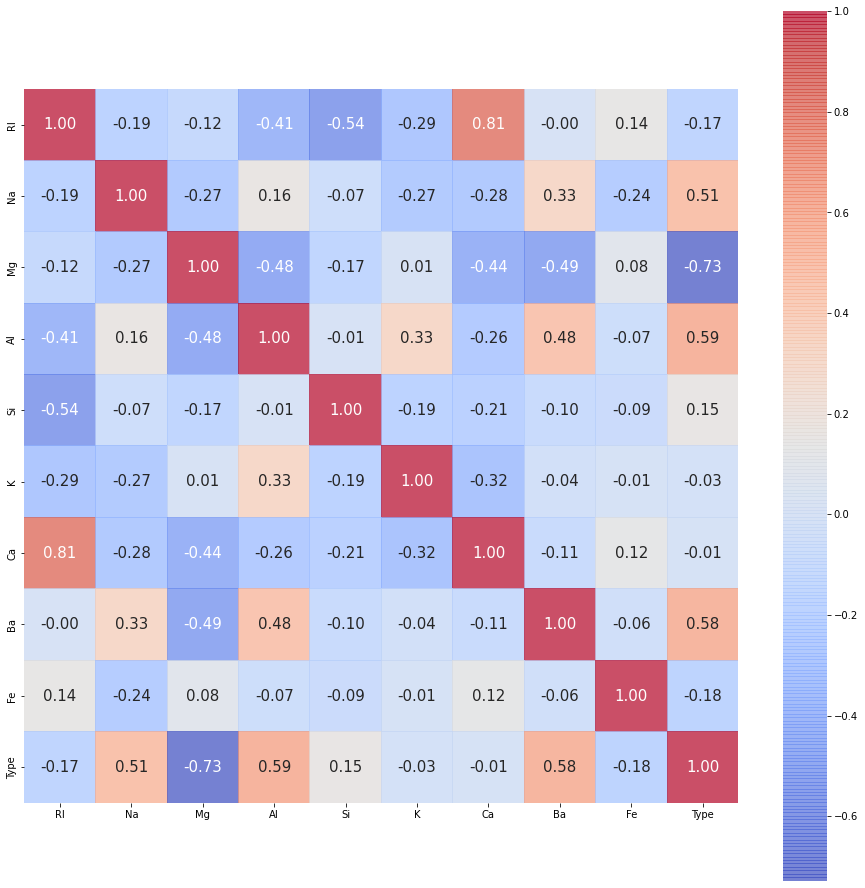

In [ ]:
plt.figure(figsize=(16,16))
sn.heatmap(df.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           alpha = 0.7,   cmap= 'coolwarm')
plt.show()

#Feature Selection

In [ ]:
x_data = x_data.drop(['Si', 'K', 'Fe'], axis=1)

x_data

,RI,Na,Mg,Al,Ca,Ba
0,1.52101,13.64,4.49,1.10,8.75,0.00
1,1.51761,13.89,3.60,1.36,7.83,0.00
2,1.51618,13.53,3.55,1.54,7.78,0.00
3,1.51766,13.21,3.69,1.29,8.22,0.00
4,1.51742,13.27,3.62,1.24,8.07,0.00
...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,9.18,1.06
210,1.51685,14.92,0.00,1.99,8.40,1.59
211,1.52065,14.36,0.00,2.02,8.44,1.64
212,1.51651,14.38,0.00,1.94,8.48,1.57


In [ ]:
scaler = StandardScaler().fit(x_data)
x_data = scaler.transform(x_data)

x_data

array([[ 0.87286765,  0.28495326,  1.25463857, -0.69244192, -0.14576634,
        -0.35287683],
       [-0.24933347,  0.59181718,  0.63616803, -0.17046023, -0.79373376,
        -0.35287683],
       [-0.72131806,  0.14993314,  0.60142249,  0.19091171, -0.82894938,
        -0.35287683],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055,  1.15457021, -0.36410319,
         2.95320036],
       [-0.61239854,  1.19327046, -1.86551055,  0.99396046, -0.33593069,
         2.81208731],
       [-0.41436305,  1.00915211, -1.86551055,  1.27502753, -0.23732695,
         3.01367739]])

#PCA

In [ ]:
scaler = StandardScaler().fit(x_data)
x_data = scaler.transform(x_data)

x_data

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca_features = pca.fit_transform(x_data)

In [ ]:
pca_df = pd.DataFrame(
    data=pca_features,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

pca_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,0.340210
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,-0.115960
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,0.126630
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,0.285805
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,0.298032
...,...,...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611,0.103227,0.231162
210,-2.397652,3.108236,-1.117502,0.288454,0.624723,0.618056
211,-1.680246,3.284823,-0.930349,-0.171014,0.451687,1.247320
212,-2.369748,2.756873,-1.234701,-0.525285,0.515008,1.003352


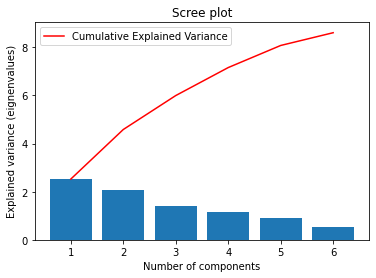

In [ ]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )

plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')

plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')

plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.27901819, 0.2277858 , 0.15609378, 0.12865138, 0.10155581,
       0.05862613])

In [ ]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[27.90181918 50.68039901 66.28977672 79.15491501 89.31049554 95.17310879]



In [ ]:
from sklearn.model_selection import train_test_split
# x_train, x_test,  y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)
x_train, x_test,  y_train, y_test = train_test_split(pca_features, y_data, test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(149, 6)
(65, 6)
(149,)
(65,)


#Model

In [ ]:
model = Sequential()

#Hidden Layer pertama
model.add(Dense(256, input_shape=(6,),name="HL-1", activation="relu"))

#Hidden Layer kedua
model.add(Dense(256, name="HL-2", activation="relu"))

#Hidden Layer ketiga
model.add(Dense(128, name="HL-3", activation="relu"))

#Hidden Layer keempat
model.add(Dense(64, name="HL-4", activation="relu"))

#Hidden Layer kelima
model.add(Dense(32, name="HL-5", activation="relu"))

#Output layer
model.add(Dense(6, name="Output-Layer", activation="sigmoid"))

#Compile Model
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HL-1 (Dense)                (None, 256)               1792      
                                                                 
 HL-2 (Dense)                (None, 256)               65792     
                                                                 
 HL-3 (Dense)                (None, 128)               32896     
                                                                 
 HL-4 (Dense)                (None, 64)                8256      
                                                                 
 HL-5 (Dense)                (None, 32)                2080      
                                                                 
 Output-Layer (Dense)        (None, 6)                 198       
                                                                 
Total params: 111,014
Trainable params: 111,014
Non-t

Epoch 1/50
4/4 [==============================] - 0s 24ms/step - loss: 0.1423 - accuracy: 0.9328 - val_loss: 2.2235 - val_accuracy: 0.6333
Epoch 2/50
4/4 [==============================] - 0s 14ms/step - loss: 0.1444 - accuracy: 0.9328 - val_loss: 2.2319 - val_accuracy: 0.6333
Epoch 3/50
4/4 [==============================] - 0s 14ms/step - loss: 0.1349 - accuracy: 0.9496 - val_loss: 2.2412 - val_accuracy: 0.6333
Epoch 4/50
4/4 [==============================] - 0s 20ms/step - loss: 0.1361 - accuracy: 0.9328 - val_loss: 2.1846 - val_accuracy: 0.6333
Epoch 5/50
4/4 [==============================] - 0s 13ms/step - loss: 0.1338 - accuracy: 0.9412 - val_loss: 2.2738 - val_accuracy: 0.6333
Epoch 6/50
4/4 [==============================] - 0s 15ms/step - loss: 0.1288 - accuracy: 0.9580 - val_loss: 2.2472 - val_accuracy: 0.6333
Epoch 7/50
4/4 [==============================] - 0s 13ms/step - loss: 0.1356 - accuracy: 0.9412 - val_loss: 2.3002 - val_accuracy: 0.6333
Epoch 8/50
4/4 [===========

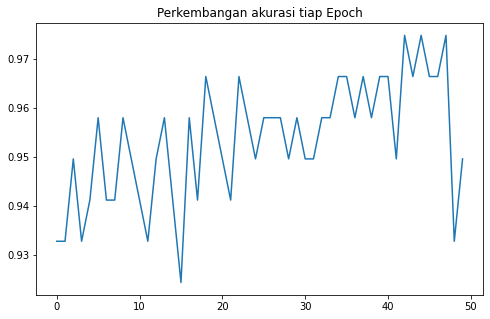

In [ ]:
import matplotlib.pyplot as plt

fitting=model.fit(x_train, y_train, epochs=50, verbose=1, validation_split=0.2)

pd.DataFrame(fitting.history)["accuracy"].plot(figsize=(8,5))
plt.title("Perkembangan akurasi tiap Epoch")
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 3.6422 - accuracy: 0.6308


[3.6422102451324463, 0.6307692527770996]